In [1]:
import json
import urllib
import os
import csv

# 0. Preliminary step to get sample data



### Option 1: Getting data from sharable google drive folder link (not recommended for large amount of files)

In [ ]:
# link to folder: https://drive.google.com/drive/folders/1ywgGgrBOMhmMb7368sPWKPe7os1UVSlE?usp=sharing
# upload data folder to your drive root folder 'My Drive' (It is the default folder).
# Upload takes ab. 45 min because of large nr of files

In [ ]:
# connect your drive to Google Colab
from google.colab import drive
drive.mount('/content/drive')
# after running this cell, open the url that displays below from your uni gmail account
# copy the code that is displayed 
# paste the code into the cell below when prompted and then press enter

In [ ]:
folder_path = '/content/drive/My Drive/data_tm_workflow/'

### Option 2: Getting data from local disk

In [ ]:
# download link for the data: https://drive.google.com/drive/folders/1ywgGgrBOMhmMb7368sPWKPe7os1UVSlE?usp=sharing
# after downloading the "data_tm_workflow" folder, put it on your computer where Jupyter has access to it

In [2]:
current_path = os.getcwd()

In [3]:
folder_path = current_path + '/data_tm_workflow/'

In [87]:
# create a folder where the output files will be downloaded and put the name of the folder in the variable here:
output_folder = 'tm_ldagensim'

# 1. Data preparation

## 1.1. Creating data frame
A dataframe is first created to keep the documents at their initial state, and the name of each file

In [4]:
import pandas as pd

In [5]:
files_list = os.listdir(folder_path)

In [6]:
#insert file names into a df
sources = pd.DataFrame(files_list, columns=['file_name'])

In [7]:
#function to read the content of the text files
def readTxtContent(fileName):
  with open(folder_path + fileName, 'r') as file:
    return ' ' + file.read().replace('\n', ' ') + ' '

In [8]:
# adding a column to the dataframe containing file content
sources['file_content'] = sources['file_name'].apply(lambda x: readTxtContent(x))

## 1.2. Adding columns for dates, publications and filtering dataset

### 1.2.1. dates, publications

In [9]:
import re

In [10]:
# function to retrieve publication ref from file name
def get_ref(file):
  ref_match = re.findall(r'(\w+\d+)_\d{4}-\d{2}-\d{2}_',file)
  return ref_match[0]

# function to retrieve date from file name
def get_date(file):
  date_match = re.findall(r'_(\d{4}-\d{2}-\d{2})_',file)
  return date_match[0]

# function to retrieve year from file name
def get_year(file):
  year_match = re.findall(r'_(\d{4})-\d{2}-\d{2}_',file)
  return year_match[0]

# function to retrieve month from file name
def get_month(file):
  month_match = re.findall(r'_\d{4}-(\d{2})-\d{2}_',file)
  return month_match[0]

# function to retrieve day from file name
def get_day(file):
  month_match = re.findall(r'_\d{4}-\d{2}-(\d{2})_',file)
  return month_match[0]

In [11]:
sources['date'] = sources['file_name'].apply(lambda x: get_date(x))
sources['year'] = sources['file_name'].apply(lambda x: get_year(x))
sources['month'] = sources['file_name'].apply(lambda x: get_month(x))
sources['day'] = sources['file_name'].apply(lambda x: get_day(x))
sources['publication'] = sources['file_name'].apply(lambda x: get_ref(x))

In [12]:
# add publication names

In [116]:
def get_pub_name(pub_number):
    if (pub_number == 'sn85066408'):
        return 'L\'Italia'
    elif (pub_number == '2012271201'):
        return 'Cronaca Sovversiva'

In [117]:
sources['publication_name'] = sources['publication'].apply(lambda x: get_pub_name(x))

### 1.2.2. Filtering

In [118]:
import datetime
from datetime import timedelta, date

In [119]:
# Start from 06.06.1903 and finish 01.05.1919

In [120]:
date_ref_1 = date(1903,6,6)
date_ref_2 = date(1919,5,1)

In [121]:
def filter_by_date(date_item,date_ref_1,date_ref_2):
    year = re.findall(r'(\d{4})-\d{2}-\d{2}',date_item)[0]
    month = re.findall(r'\d{4}-(\d{2})-\d{2}',date_item)[0]
    day = re.findall(r'\d{4}-\d{2}-(\d{2})',date_item)[0]
    file_date = date(int(year),int(month),int(day))
    if (date_ref_1 <= file_date <= date_ref_2):
        return 'included'
    else:
        return 'not included'

In [122]:
sources['status'] = sources['date'].apply(lambda x: filter_by_date(x,date_ref_1,date_ref_2))

In [123]:
sources

,file_name,file_content,date,year,month,day,publication,publication_name,status
0,sn85066408_1913-03-10_ed-1_seq-1_ocr.txt,anno xxvil rpiù VECCHIO DIFPUSO QUOTIDIANO IT...,1913-03-10,1913,03,10,sn85066408,L'Italia,included
1,sn85066408_1910-06-16_ed-1_seq-1_ocr.txt,"(,oììiìiI IliiUnno fatto gl'italiani VECCHIQ ...",1910-06-16,1910,06,16,sn85066408,L'Italia,included
2,sn85066408_1915-05-09_ed-1_seq-1_ocr.txt,SUNDAY EDTION PIU VECCHIO DlfFbSO QUOTIDIANO ...,1915-05-09,1915,05,09,sn85066408,L'Italia,included
3,sn85066408_1898-03-22_ed-1_seq-1_ocr.txt,aumo Xll TliÈ FIRST ITALIAN DAILY PAPER THE P...,1898-03-22,1898,03,22,sn85066408,L'Italia,not included
4,sn85066408_1911-09-01_ed-1_seq-1_ocr.txt,Giornale italiano fatto gTItaliani PIÙ VECCHI...,1911-09-01,1911,09,01,sn85066408,L'Italia,included
...,...,...,...,...,...,...,...,...,...
7255,sn85066408_1918-08-21_ed-1_seq-1_ocr.txt,permit No. onthorlzed the Art October file th...,1918-08-21,1918,08,21,sn85066408,L'Italia,included
7256,sn85066408_1902-12-27_ed-1_seq-1_ocr.txt,ASfNO XVI FIRST ilALIAN DAilV PAPER THE PACI ...,1902-12-27,1902,12,27,sn85066408,L'Italia,not included
7257,sn85066408_1916-09-14_ed-1_seq-1_ocr.txt,xxx più VECCHIO DlffUSO QUOTIDIANO ITALIANO A...,1916-09-14,1916,09,14,sn85066408,L'Italia,included
7258,sn85066408_1903-11-25_ed-1_seq-1_ocr.txt,(CORNALE ITALIANO FATTO PER GLMTALIAff THE FI...,1903-11-25,1903,11,25,sn85066408,L'Italia,included


In [124]:
# variable containing the documents separately
corpus_df = sources[sources['status'] == 'included'].copy().reset_index()

## 1.2 Removing stop words, punctuation, short words

In [23]:
! pip install nltk

In [24]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariella.decrouychan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariella.decrouychan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# if there is a message above with a certificate error:
# In the python application folder double-click on the file 'Certificates.command'
# this will make a prompt window show in your screen and basically will automatically install the certificate for you, close this window and try again.

In [131]:
# add tokenized documents in dataframe
corpus_df['tokens'] = corpus_df['file_content'].apply(lambda x: nltk.word_tokenize(x))

In [132]:
# possible user options:
# .isalnum() to removes tokens that include numbers
# .isalpha() to remove all tokens that contain more than letters (punctuation and numbers)
# .isdecimal() to remove tokens that contain only decimals
# .isdigit() to remove tokens that contain only digits

# add new column in df with processed tokens (here: keeping only alpha tokens longer than 3 characters + lowercasing)
corpus_df['doc_prep'] = corpus_df['tokens'].apply(lambda x: [w.lower() for w in x if (w.isalpha() and len(w) > 2 )])

In [133]:
# link to custom stop words: https://drive.google.com/file/d/1VVfW6AKPbb7_fICOG73lEgkXmmZ6BkpC/view?usp=sharing
# please put custom stop words list accessible to Jupyter

In [134]:
from nltk.corpus import stopwords
ital_stopwords = stopwords.words('italian')
en_stopwords = stopwords.words('english')

In [135]:
stop_words = pd.read_csv('stop_words.csv')

In [136]:
stopwords = stop_words['stopword'].values.tolist()

In [137]:
# add english stop words list to custom stopwords 
stopwords.extend(en_stopwords)

In [138]:
# to append list of words added by user: ital_stopwords.extend(user_input)
# to remove words: ital_stopwords.remove(user_input)

In [139]:
# add column with tokenized documents without sw
corpus_df['doc_prep_nostop'] = corpus_df['doc_prep'].apply(lambda x: [w for w in x if not w in stopwords])

In [140]:
corpus_df['doc_prep_nostop']

0       [xxvil, rpiù, vecchio, difpuso, quotidiano, it...
1       [oììiìii, iliiunno, vecchiq, aliano, ovest, so...
2       [sunday, edtion, vecchio, dlffbso, quotidiano,...
3       [giornale, italiano, gtitaliani, vecchio, quot...
4       [umanità, italiani, pacific, cat, aumagia, pat...
                              ...                        
5977    [unto, vecchio, wffuso, quotidiano, italiano, ...
5978    [permit, onthorlzed, art, october, file, fort,...
5979    [xxx, vecchio, dlffuso, quotidiano, italiano, ...
5980    [cornale, italiano, glmtaliaff, first, italian...
5981    [xxvi, vecchio, diffuso, quotidiano, italiano,...
Name: doc_prep_nostop, Length: 5982, dtype: object

In [36]:
# set the variable to use for topic modelling (if no further options are used)
corpus_model = corpus_df['doc_prep_nostop']

In [88]:
# save the data after pre-processing in the output folder for verification of pre-processing steps
corpus_df.to_csv(output_folder + '/corpus_df.csv')

## 1.4 Lemmatize

In [ ]:
# Lemmatization is available in multiple languages in Spacy and not in NLTK (only English)
# With Spacy, lemmatization is available for 10 languages. There's also a multi-language option that
# should be tested if additional languages are needed

In [42]:
!pip install spacy

     |████████████████████████████████| 10.1 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.7 MB 604 kB/s eta 0:00:011
     |████████████████████████████████| 183 kB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 17.7 MB/s eta 0:00:01
     |████████████████████████████████| 112 kB 18.8 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 1.6 MB/s  eta 0:00:01
     |████████████████████████████████| 58 kB 19.6 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 11.1 MB/s eta 0:00:01
Using legacy setup.py install for wasabi, since package 'wheel' is not installed.
    Running setup.py install for wasabi ... done


In [46]:
!python3 -m spacy download it_core_news_sm

     |████████████████████████████████| 14.5 MB 1.3 MB/s eta 0:00:01
Using legacy setup.py install for it-core-news-sm, since package 'wheel' is not installed.
    Running setup.py install for it-core-news-sm ... done
✔ Download and installation successful
You can now load the model via spacy.load('it_core_news_sm')


In [47]:
import it_core_news_sm
it_nlp = it_core_news_sm.load(disable=['tagger', 'parser', 'ner'])

In [48]:
# lemmatization function
def lemmatize(doc):
  lemmatized_doc = []
  for w in doc:
    w_lemma = [token.lemma_ for token in it_nlp(w)]
    lemmatized_doc.append(w_lemma[0])
  return lemmatized_doc

In [50]:
# takes a long time to run
# add column with lemmatized tokens - directly from the tokens as preprocessing has already been done
corpus_df['doc_lemmatized'] = corpus_df['doc_prep_nostop'].apply(lambda x: lemmatize(x))

In [51]:
# variable with lemmatized tokens
lemmatized_corpus = corpus_df['doc_lemmatized']
# the lemmatized version is not used in this example

# 2. Topics with LDA

In [37]:
#Gensim installation
! pip install gensim

In [38]:
import gensim
from gensim.test.utils import common_corpus, common_dictionary
from gensim import corpora, models
from gensim.models.wrappers import LdaMallet

## 2.1 Preliminary steps to run LDA



### 2.1.1 Bag of words

In [39]:
# if you use lemmatized version replace "corpus_model" by lemmatized_corpus
id2word = corpora.Dictionary(corpus_model)
corpus = [id2word.doc2bow(text) for text in corpus_model]

## 2.2 LDA

In [40]:
# set the number of topics here for a first look
numtopics = 8

In [41]:
ldagensim = gensim.models.ldamulticore.LdaMulticore(corpus, id2word=id2word, num_topics=numtopics, chunksize = 100, passes = 10, eval_every = None)


In [42]:
topic_print = ldagensim.print_topics(num_words=30)

In [43]:
df_topic_print = pd.DataFrame(topic_print, columns=['topic_id','words'])

In [45]:
df_topic_print.to_csv(output_folder + '/init_topics.csv')

## 2.3 Topic Coherence
Topic Coherence measures score of a single topic by measuring the degree of semantic similarity between high scoring words in the topic. https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

In [46]:
from gensim.models.coherencemodel import CoherenceModel

In [47]:
coherence_model_ldagensim = CoherenceModel(model=ldagensim, texts=corpus_model, dictionary=id2word, coherence='c_v')
coherence_ldagensim = coherence_model_ldagensim.get_coherence()
print('\nCoherence Score LDA Gensim: ', coherence_ldagensim)


Coherence Score LDA Gensim:  0.3886866934593425


## 2.4 Coherence and number of topics

In [ ]:
# as coherence calculation takes a very long time to run (around 45min with lowest accuracy), I removed the accuracy parameters for performance reasons 
# it's normal that the coherence is then lower than what was found earlier, as the parameters
# give less accurate results

In [48]:
%%capture
topics_nr = []
coherence_values_gensim = []
for num_topics in range(3, 20):
  model = gensim.models.ldamulticore.LdaMulticore(corpus, id2word=id2word, num_topics=num_topics)
  coherencemodel = CoherenceModel(model=model, texts=corpus_model, dictionary=id2word, coherence='c_v')
  coherence_value = coherencemodel.get_coherence()
  coherence_values_gensim.append(coherence_value)
  topics_nr.append(str(num_topics))

In [49]:
for i in range(len(topics_nr)):
  print("Num Topics =", topics_nr[i], " has Coherence Value of", round(coherence_values_gensim[i],4))

Num Topics = 3  has Coherence Value of 0.385
Num Topics = 4  has Coherence Value of 0.3795
Num Topics = 5  has Coherence Value of 0.3789
Num Topics = 6  has Coherence Value of 0.3776
Num Topics = 7  has Coherence Value of 0.3904
Num Topics = 8  has Coherence Value of 0.3847
Num Topics = 9  has Coherence Value of 0.3762
Num Topics = 10  has Coherence Value of 0.3792
Num Topics = 11  has Coherence Value of 0.3781
Num Topics = 12  has Coherence Value of 0.371
Num Topics = 13  has Coherence Value of 0.3859
Num Topics = 14  has Coherence Value of 0.3774
Num Topics = 15  has Coherence Value of 0.3867
Num Topics = 16  has Coherence Value of 0.3809
Num Topics = 17  has Coherence Value of 0.3782
Num Topics = 18  has Coherence Value of 0.385
Num Topics = 19  has Coherence Value of 0.3859


In [50]:
df_coherence = pd.DataFrame(topics_nr, columns=['topic_id'])

In [51]:
df_coherence['topic_coherence'] = coherence_values_gensim

In [52]:
df_coherence.to_csv(output_folder +'/coherence_values.csv')

In [53]:
# Visualize coherence scores
import matplotlib.pyplot as plt

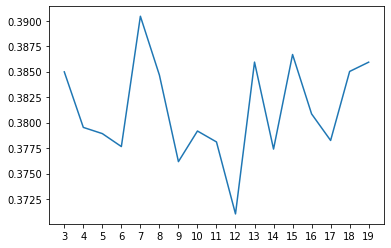

In [54]:
plt.plot(topics_nr, coherence_values_gensim)

In [ ]:
# To analyse the results, the user can print the list of topics for different topic nr

In [55]:
# print topics for nr of topics = 15 - I put here parameters for better accuracy as this will be 
# the model used to do the rest of calculations - takes approx 15min to run
numtopics = 7
model = gensim.models.ldamulticore.LdaMulticore(corpus, id2word=id2word, num_topics=numtopics, chunksize = 100, passes = 10, eval_every = None)
#model = gensim.models.ldamulticore.LdaMulticore(corpus, id2word=id2word, num_topics=numtopics, iterations = 400, chunksize = 2000, passes = 20)

In [81]:
# topic_print_8_advanced = model.print_topics(num_words=30)

In [82]:
# df_topic_print_8_advanced = pd.DataFrame(topic_print_8_advanced, columns=['topic_id','words'])

In [83]:
# df_topic_print_8_advanced.to_csv(output_folder +'/advanced_topics_8.csv')

# Topic visualisation

## Data Preparation

In [123]:
# for Google Colab
#!wget https://raw.githubusercontent.com/DHARPA-Project/TopicModelling-/master/vis-files/tm_1/jscode-test-2.js
#!wget https://raw.githubusercontent.com/DHARPA-Project/TopicModelling-/master/vis-files/tm_1/tm1_data_prepare_gensim.py

In [105]:
%%capture
!pip install funcy

In [130]:
%run -i vis-files/tm_1/tm1_data_prepare_gensim

In [131]:
# if the nr of topic is not 8 replace variable ldagensim by variable model
data_vis = prepare(ldagensim, corpus, id2word, doc_topic_dist=None)

KeyboardInterrupt: 

In [ ]:
topic_info = data_vis[1][data_vis[1]['Category'] == 'Default'].copy()

In [ ]:
topic_info['relevance'] = ''

In [ ]:
for i in range(numtopics):
  topic_num = i+1
  data = data_vis.sorted_terms(topic=topic_num, _lambda=.6).copy()
  topic_info = topic_info.append(data)

In [ ]:
# uncomment to show the full output of a topic, replace 'Topic8' by the topic to display
# topic_info[topic_info['Category'] == 'Topic8']

In [ ]:
topic_info.to_csv('tm_ldagensim/topic_info.csv')

In [ ]:
topic_proportion = data_vis[0].copy()

In [ ]:
topic_proportion['proportion'] = topic_proportion['Freq'] / 100

In [ ]:
topic_proportion.index.name = 'topic_id'

In [ ]:
topic_proportion.to_csv('tm_ldagensim/topic_proportion.csv')

In [ ]:
%%capture
import notebook.nbextensions
notebook.nbextensions.install_nbextension('topic_info.csv', user=True)
notebook.nbextensions.install_nbextension('topic_proportion.csv', user=True)

## Visualisation

In [ ]:
from IPython.display import display, HTML
from IPython.core.display import Javascript

In [ ]:
display(HTML('<style>@import url("https://fonts.googleapis.com/css2?family=Fira+Sans:wght@300&display=swap");#vis_tm_1{width:40%; margin-left:20%}.svg-container{position:relative;width:100%;vertical-align:top;overflow:hidden;margin:0;padding:0;}.svg-content-responsive{margin:0;padding:0;display:inline-block;position:absolute;top:0;left:0}.line_style{stroke:"rgb(70, 130, 180,.3)";stroke-width:1}.svg_h1{font-size:.9em}.svg_h1,.svg_h2{font-family:"Fira Sans",Arial}.svg_h2{font-size:.6em}.svg_text{font-size:.8em}.svg_text,.svg_text_2{font-family:"Fira Sans",Arial}.svg_text_2{font-size:.7em}.svg_text_3{font-family:"Fira Sans";font-size:.6em}.select_box{width:30%;padding-left:1em;font-family:"Fira Sans",Arial}.select_box select{width:100%;background-color:#fff;padding:.5em .6em;box-shadow:inset 0 1px 3px #ddd;vertical-align:middle;font-family:"Fira Sans",Arial,sans-serif;letter-spacing:.01em;line-height:1.15;-webkit-writing-mode:horizontal-tb!important;text-rendering:auto;color:#000;letter-spacing:normal;word-spacing:normal;text-transform:none;text-indent:0;text-shadow:none;display:inline-block;text-align:start;-webkit-appearance:menulist;align-items:center;white-space:pre;-webkit-rtl-ordering:logical;background-color:#f8f8f8;cursor:default;margin:0;font:400 11px system-ui;border-radius:5px;border:1px solid #a6a6a6;border-image:none;border-image:initial}.select_box select:focus{border-color:#fff;outline:0;box-shadow:inset 0 1px 1px rgba(0,0,0,.075),0 0 1px rgba(102,175,233,.2)}</style>'))
display(HTML('<div id="vis_tm_1"></div>'))
Javascript(filename='jscode-test-2.js')

<IPython.core.display.Javascript object>

# Topic distribution

## 3.1. Distribution per topic and per document

In [125]:
%%capture
ldamodel = model

In [126]:
doc_topic_weights = ldamodel.inference(corpus)[0]
doc_topic_dists = doc_topic_weights / doc_topic_weights.sum(axis=1)[:, None]

In [127]:
distribution_gensim = pd.DataFrame(doc_topic_dists,columns=[f'topic{i}' for i in range(numtopics)])

In [128]:
distribution_gensim.index.name = 'document'

In [160]:
# add file names and publication name
distribution_gensim_wfiles = distribution_gensim.copy()
distribution_gensim_wfiles.insert(0, 'document_path', corpus_df['file_name'])
distribution_gensim_wfiles.insert(1, 'publication_name', corpus_df['publication_name'])
distribution_gensim_wfiles

,document_path,publication_name,topic0,topic1,topic2,topic3,topic4,topic5,topic6
document,,,,,,,,,
0,sn85066408_1913-03-10_ed-1_seq-1_ocr.txt,L'Italia,0.001081,0.019088,0.643670,0.000093,0.000093,0.000093,0.335880
1,sn85066408_1910-06-16_ed-1_seq-1_ocr.txt,L'Italia,0.000084,0.000084,0.937544,0.000083,0.000083,0.000083,0.062038
2,sn85066408_1915-05-09_ed-1_seq-1_ocr.txt,L'Italia,0.820413,0.000118,0.092584,0.000118,0.000118,0.000118,0.086531
3,sn85066408_1911-09-01_ed-1_seq-1_ocr.txt,L'Italia,0.089421,0.009352,0.740859,0.000083,0.000083,0.000083,0.160120
4,sn85066408_1904-11-30_ed-1_seq-1_ocr.txt,L'Italia,0.041844,0.000111,0.425926,0.000110,0.000110,0.000110,0.531789
...,...,...,...,...,...,...,...,...,...
5977,sn85066408_1916-05-01_ed-1_seq-1_ocr.txt,L'Italia,0.879777,0.008015,0.111852,0.000089,0.000089,0.000089,0.000089
5978,sn85066408_1918-08-21_ed-1_seq-1_ocr.txt,L'Italia,0.967455,0.000112,0.031988,0.000111,0.000111,0.000111,0.000112
5979,sn85066408_1916-09-14_ed-1_seq-1_ocr.txt,L'Italia,0.771826,0.000122,0.223102,0.000122,0.000122,0.000122,0.004585


## 3.2. Distribution per topic for the whole corpus

In [161]:
corpus_df['doc_length'] = corpus_df['doc_prep_nostop'].apply(lambda x: len(x))

In [162]:
topic_frequency = distribution_gensim.mul(corpus_df['doc_length'], axis=0).sum()

In [163]:
topic_proportion = (topic_frequency / topic_frequency.sum()*100).sort_values(ascending=False)

In [164]:
topic_proportion

topic2    50.769461
topic0    22.801644
topic6    19.963847
topic1     6.435236
topic5     0.009953
topic3     0.009930
topic4     0.009930
dtype: float64

In [165]:
# dataframe with values to sort them by order of importance
distribution_df_gensim = pd.DataFrame(topic_proportion, columns=['weight'])

In [166]:
distribution_df_gensim.index.name = "topics"

In [167]:
topics = distribution_df_gensim.index.array

Text(0.5, 0, 'Weight (%)')

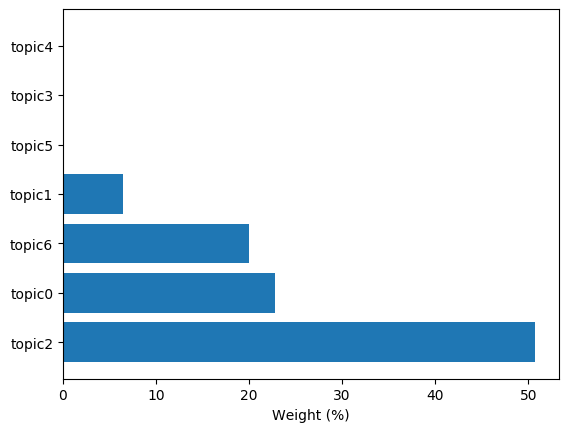

In [168]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(topics, distribution_df_gensim['weight'], align='center')
ax.set_xlabel('Weight (%)')

### 3.3. Distribution per publication


In [169]:
import re
import seaborn as sns

In [170]:
gensim_groupby2 = distribution_gensim_wfiles.copy()

In [171]:
distribution_title = gensim_groupby2.groupby(['publication_name']).mean().reset_index()
#distribution_title['publication'] = distribution_title['publication'].apply(lambda x: get_pub_name(x))

In [172]:
distribution_title

,publication_name,topic0,topic1,topic2,topic3,topic4,topic5,topic6
0,Cronaca Sovversiva,0.028074,0.778759,0.180214,0.000169,0.000169,0.000169,0.012447
1,L'Italia,0.269562,0.004986,0.504026,0.000239,0.000239,0.000300,0.220648


In [177]:
#restructuring df so that it can work with seaborn
df_vis2 = pd.DataFrame(columns=['publication', 'topic_id', 'distribution'])
x=0
columns_nr = len(distribution_title.columns)-1
for i in range(len(distribution_title)):
  for j in range(columns_nr):
    df_vis2.loc[x] = ''
    df_vis2['publication'].loc[x] = distribution_title['publication_name'].loc[i]
    df_vis2['topic_id'].loc[x] = distribution_title.columns[j+1]
    df_vis2['distribution'].loc[x] = distribution_title.iloc[i,(j+1)]
    x+= 1

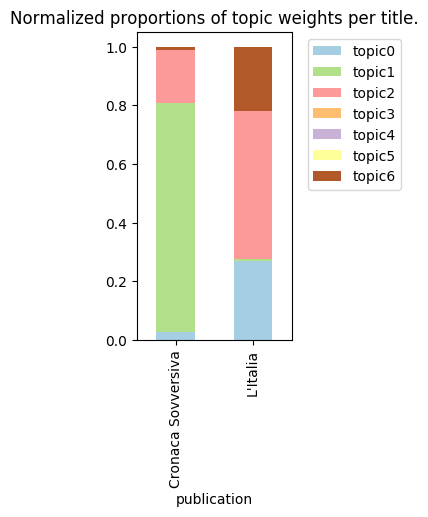

In [178]:
df_vis2.pivot('publication','topic_id', 'distribution')\
.plot(kind='bar', stacked=True, colormap='Paired', 
      figsize=(2,4), title='Normalized proportions of topic weights per title.')\
.legend(bbox_to_anchor=(1.75, 1))

# Topics weight over time

## 4.1 Aggregate document weights

In [78]:
# grouping data per month

In [180]:
distribution_gensim_wfiles['date'] = distribution_gensim_wfiles['document_path'].apply(lambda x: get_date(x))
distribution_gensim_wfiles['year'] = distribution_gensim_wfiles['document_path'].apply(lambda x: get_year(x))
distribution_gensim_wfiles['month'] = distribution_gensim_wfiles['document_path'].apply(lambda x: get_month(x))

In [181]:
gensim_groupby = distribution_gensim_wfiles.copy()

In [182]:
# drop columns that won't be needed at this stage
gensim_groupby = gensim_groupby.drop(['document_path', 'date'], axis=1)

In [183]:
# group by year 
distribution_year = gensim_groupby.groupby(['year']).mean().reset_index()

In [184]:
distribution_year

,year,topic0,topic1,topic2,topic3,topic4,topic5,topic6
0,1903,0.012288,0.124462,0.498348,0.000131,0.000131,0.000131,0.364510
1,1904,0.032974,0.123300,0.174552,0.000120,0.000120,0.000120,0.668814
2,1905,0.008474,0.124912,0.344538,0.000116,0.000116,0.000116,0.521728
3,1906,0.006625,0.126925,0.550741,0.000115,0.000115,0.000115,0.315365
4,1907,0.005850,0.115891,0.847640,0.000099,0.000099,0.000099,0.030322
5,1908,0.013680,0.115987,0.847723,0.000884,0.000884,0.000884,0.019959
6,1909,0.010623,0.111948,0.831351,0.000491,0.000491,0.000491,0.044607
7,1910,0.008970,0.101975,0.855743,0.000098,0.000098,0.000098,0.033016
8,1911,0.051373,0.097214,0.600264,0.000552,0.000552,0.001421,0.248624
9,1912,0.107496,0.115913,0.367643,0.000103,0.000103,0.000103,0.408640


## 4.2 Monthly average of normalized weight per topic

### 4.2.1. Line chart view 

In [185]:
#restructuring df so that it can work with seaborn
df_vis = pd.DataFrame(columns=['time', 'topic_id', 'distribution'])
x=0
columns_nr = len(distribution_year.columns)-2
for i in range(len(distribution_year)):
  for j in range(columns_nr):
    df_vis.loc[x] = ''
    df_vis['time'].loc[x] = distribution_year['year'].loc[i]
    df_vis['topic_id'].loc[x] = distribution_year.columns[j+1]
    df_vis['distribution'].loc[x] = distribution_year.iloc[i,(j+1)]
    x+= 1

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


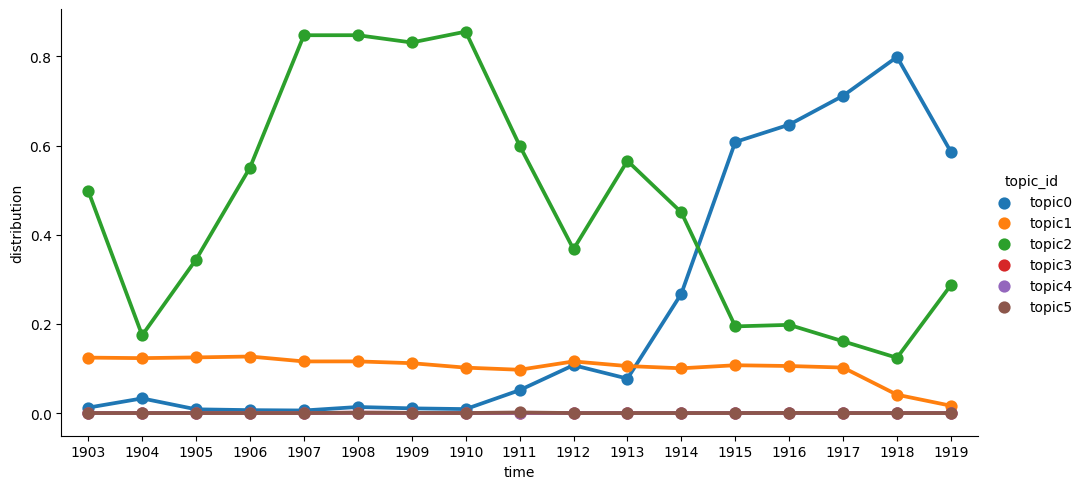

In [186]:
sns.factorplot(data= df_vis, 
               x= 'time',
               y= 'distribution',
               hue = 'topic_id',
               aspect=2,
               saturation=.5)

### 4.2.2. Bar chart view

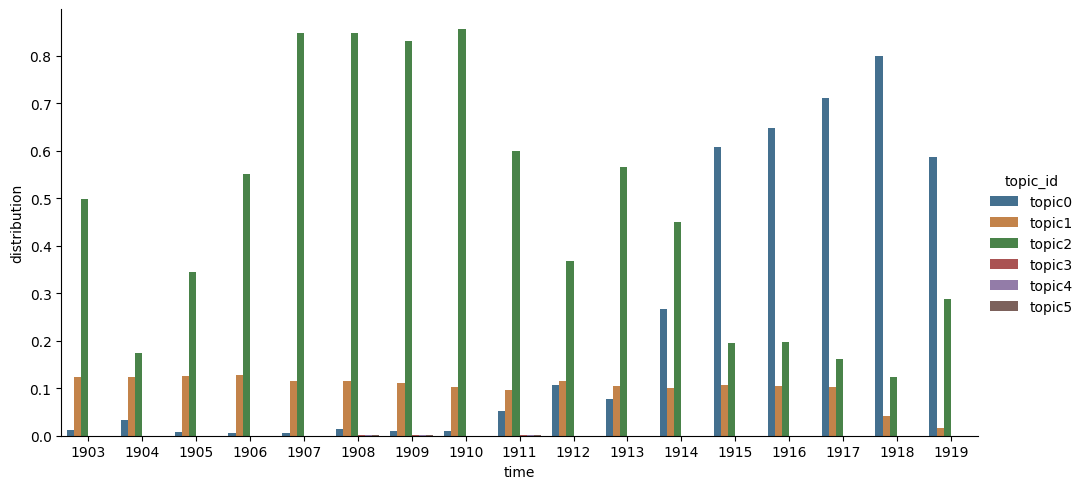

In [187]:
sns.factorplot(data= df_vis, 
               x= 'time',
               y= 'distribution',
               kind= 'bar',
               hue = 'topic_id',
               aspect=2,
               saturation=.5)

### 4.2.3. Topic weights per title over time



In [188]:
gensim_groupby3 = distribution_gensim_wfiles.copy()

In [191]:
distribution_title_time = gensim_groupby3.groupby(['year','publication_name']).mean().reset_index()

In [192]:
distribution_title_time

,year,publication_name,topic0,topic1,topic2,topic3,topic4,topic5,topic6
0,1903,Cronaca Sovversiva,0.009662,0.839965,0.123202,0.000215,0.000215,0.000215,0.026525
1,1903,L'Italia,0.012728,0.004497,0.561246,0.000117,0.000117,0.000117,0.421178
2,1904,Cronaca Sovversiva,0.010722,0.812597,0.157867,0.000216,0.000216,0.000216,0.018164
3,1904,L'Italia,0.036766,0.005831,0.177395,0.000104,0.000104,0.000104,0.779696
4,1905,Cronaca Sovversiva,0.007008,0.804144,0.178837,0.000229,0.000229,0.000229,0.009322
5,1905,L'Italia,0.008721,0.010236,0.372513,0.000097,0.000097,0.000097,0.608238
6,1906,Cronaca Sovversiva,0.010664,0.777557,0.206019,0.000228,0.000228,0.000228,0.005077
7,1906,L'Italia,0.005866,0.004625,0.615539,0.000093,0.000093,0.000093,0.373690
8,1907,Cronaca Sovversiva,0.008451,0.760422,0.218942,0.000210,0.000210,0.000210,0.011554
9,1907,L'Italia,0.005405,0.005642,0.955180,0.000080,0.000080,0.000080,0.033532


### 4.2.4. Rolling average

#### 4.2.4.1. Rolling average by topic

In [193]:
rolling_mean = distribution_year.rolling(2).mean()

In [194]:
#restructuring df so that it can work with seaborn
df_vis3 = pd.DataFrame(columns=['time', 'topic_id', 'rolling_mean'])
x=0
columns_nr = len(rolling_mean.columns)-2
for i in range(len(rolling_mean)):
  for j in range(columns_nr):
    if ( rolling_mean.iloc[i,(j+1)] > 0 ):
      df_vis3.loc[x] = ''
      df_vis3['time'].loc[x] = distribution_year['year'].loc[i]
      df_vis3['topic_id'].loc[x] = rolling_mean.columns[j+1]
      df_vis3['rolling_mean'].loc[x] = rolling_mean.iloc[i,(j+1)]
      x+= 1

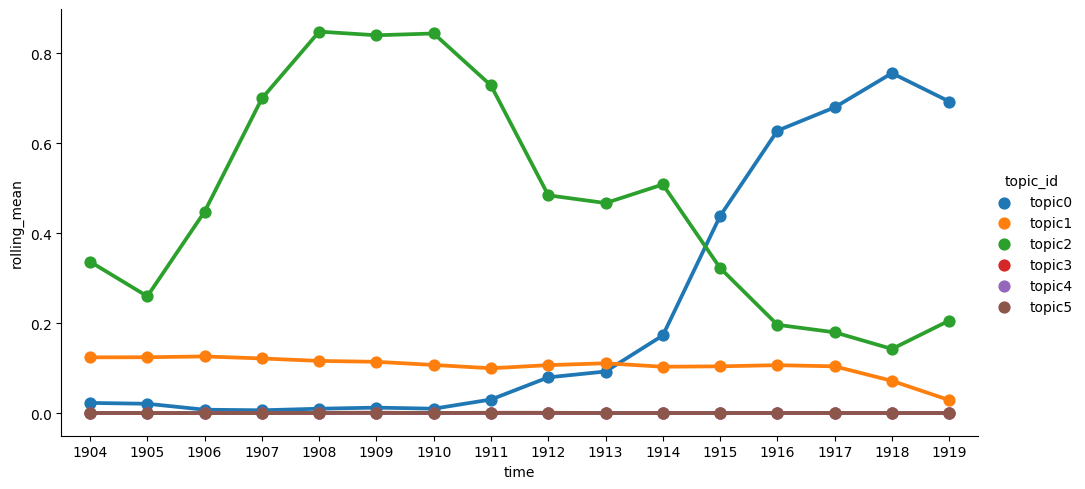

In [195]:
sns.factorplot(data= df_vis3, 
               x= 'time',
               y= 'rolling_mean',
               hue = 'topic_id',
               aspect=2,
               saturation=.5)